In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset

In [261]:
dataset = pd.read_csv("data.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [262]:
dataset.rename(columns={'MEDV':'PRICE'}, inplace=True)

In [263]:
## information on dataset, like non-null, count of each column , dtype

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  PRICE    511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [264]:
## stats on dataset, on all numarical columns

dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [265]:
## checking missing values 
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [266]:
dataset.dropna(axis=0, inplace=True)

In [267]:
## Exploratory data analysis
## checking correlation

dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199418,0.406479,-0.056024,0.420170,-0.220363,0.352817,-0.377904,0.625407,0.582884,0.278265,-0.383363,0.406266,-0.381994
ZN,-0.199418,1.000000,-0.536888,-0.041824,-0.517737,0.307812,-0.567952,0.666410,-0.309652,-0.312901,-0.394101,0.176625,-0.390730,0.339327
INDUS,0.406479,-0.536888,1.000000,0.061746,0.762864,-0.392193,0.644182,-0.709589,0.594344,0.718784,0.378739,-0.357787,0.558093,-0.466094
CHAS,-0.056024,-0.041824,0.061746,1.000000,0.090200,0.089952,0.086664,-0.097049,-0.006803,-0.035770,-0.124780,0.050143,-0.056881,0.164175
NOX,0.420170,-0.517737,0.762864,0.090200,1.000000,-0.301778,0.730640,-0.770167,0.609839,0.665914,0.185864,-0.379523,0.540542,-0.412974
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.352817,-0.567952,0.644182,0.086664,0.730640,-0.237335,1.000000,-0.748698,0.456212,0.505186,0.261170,-0.273739,0.528674,-0.366717
DIS,-0.377904,0.666410,-0.709589,-0.097049,-0.770167,0.199853,-0.748698,1.000000,-0.491789,-0.530665,-0.237141,0.291309,-0.470697,0.235206
RAD,0.625407,-0.309652,0.594344,-0.006803,0.609839,-0.213078,0.456212,-0.491789,1.000000,0.910898,0.441336,-0.441338,0.424516,-0.382068
TAX,0.582884,-0.312901,0.718784,-0.035770,0.665914,-0.293969,0.505186,-0.530665,0.910898,1.000000,0.442510,-0.439917,0.483227,-0.461959


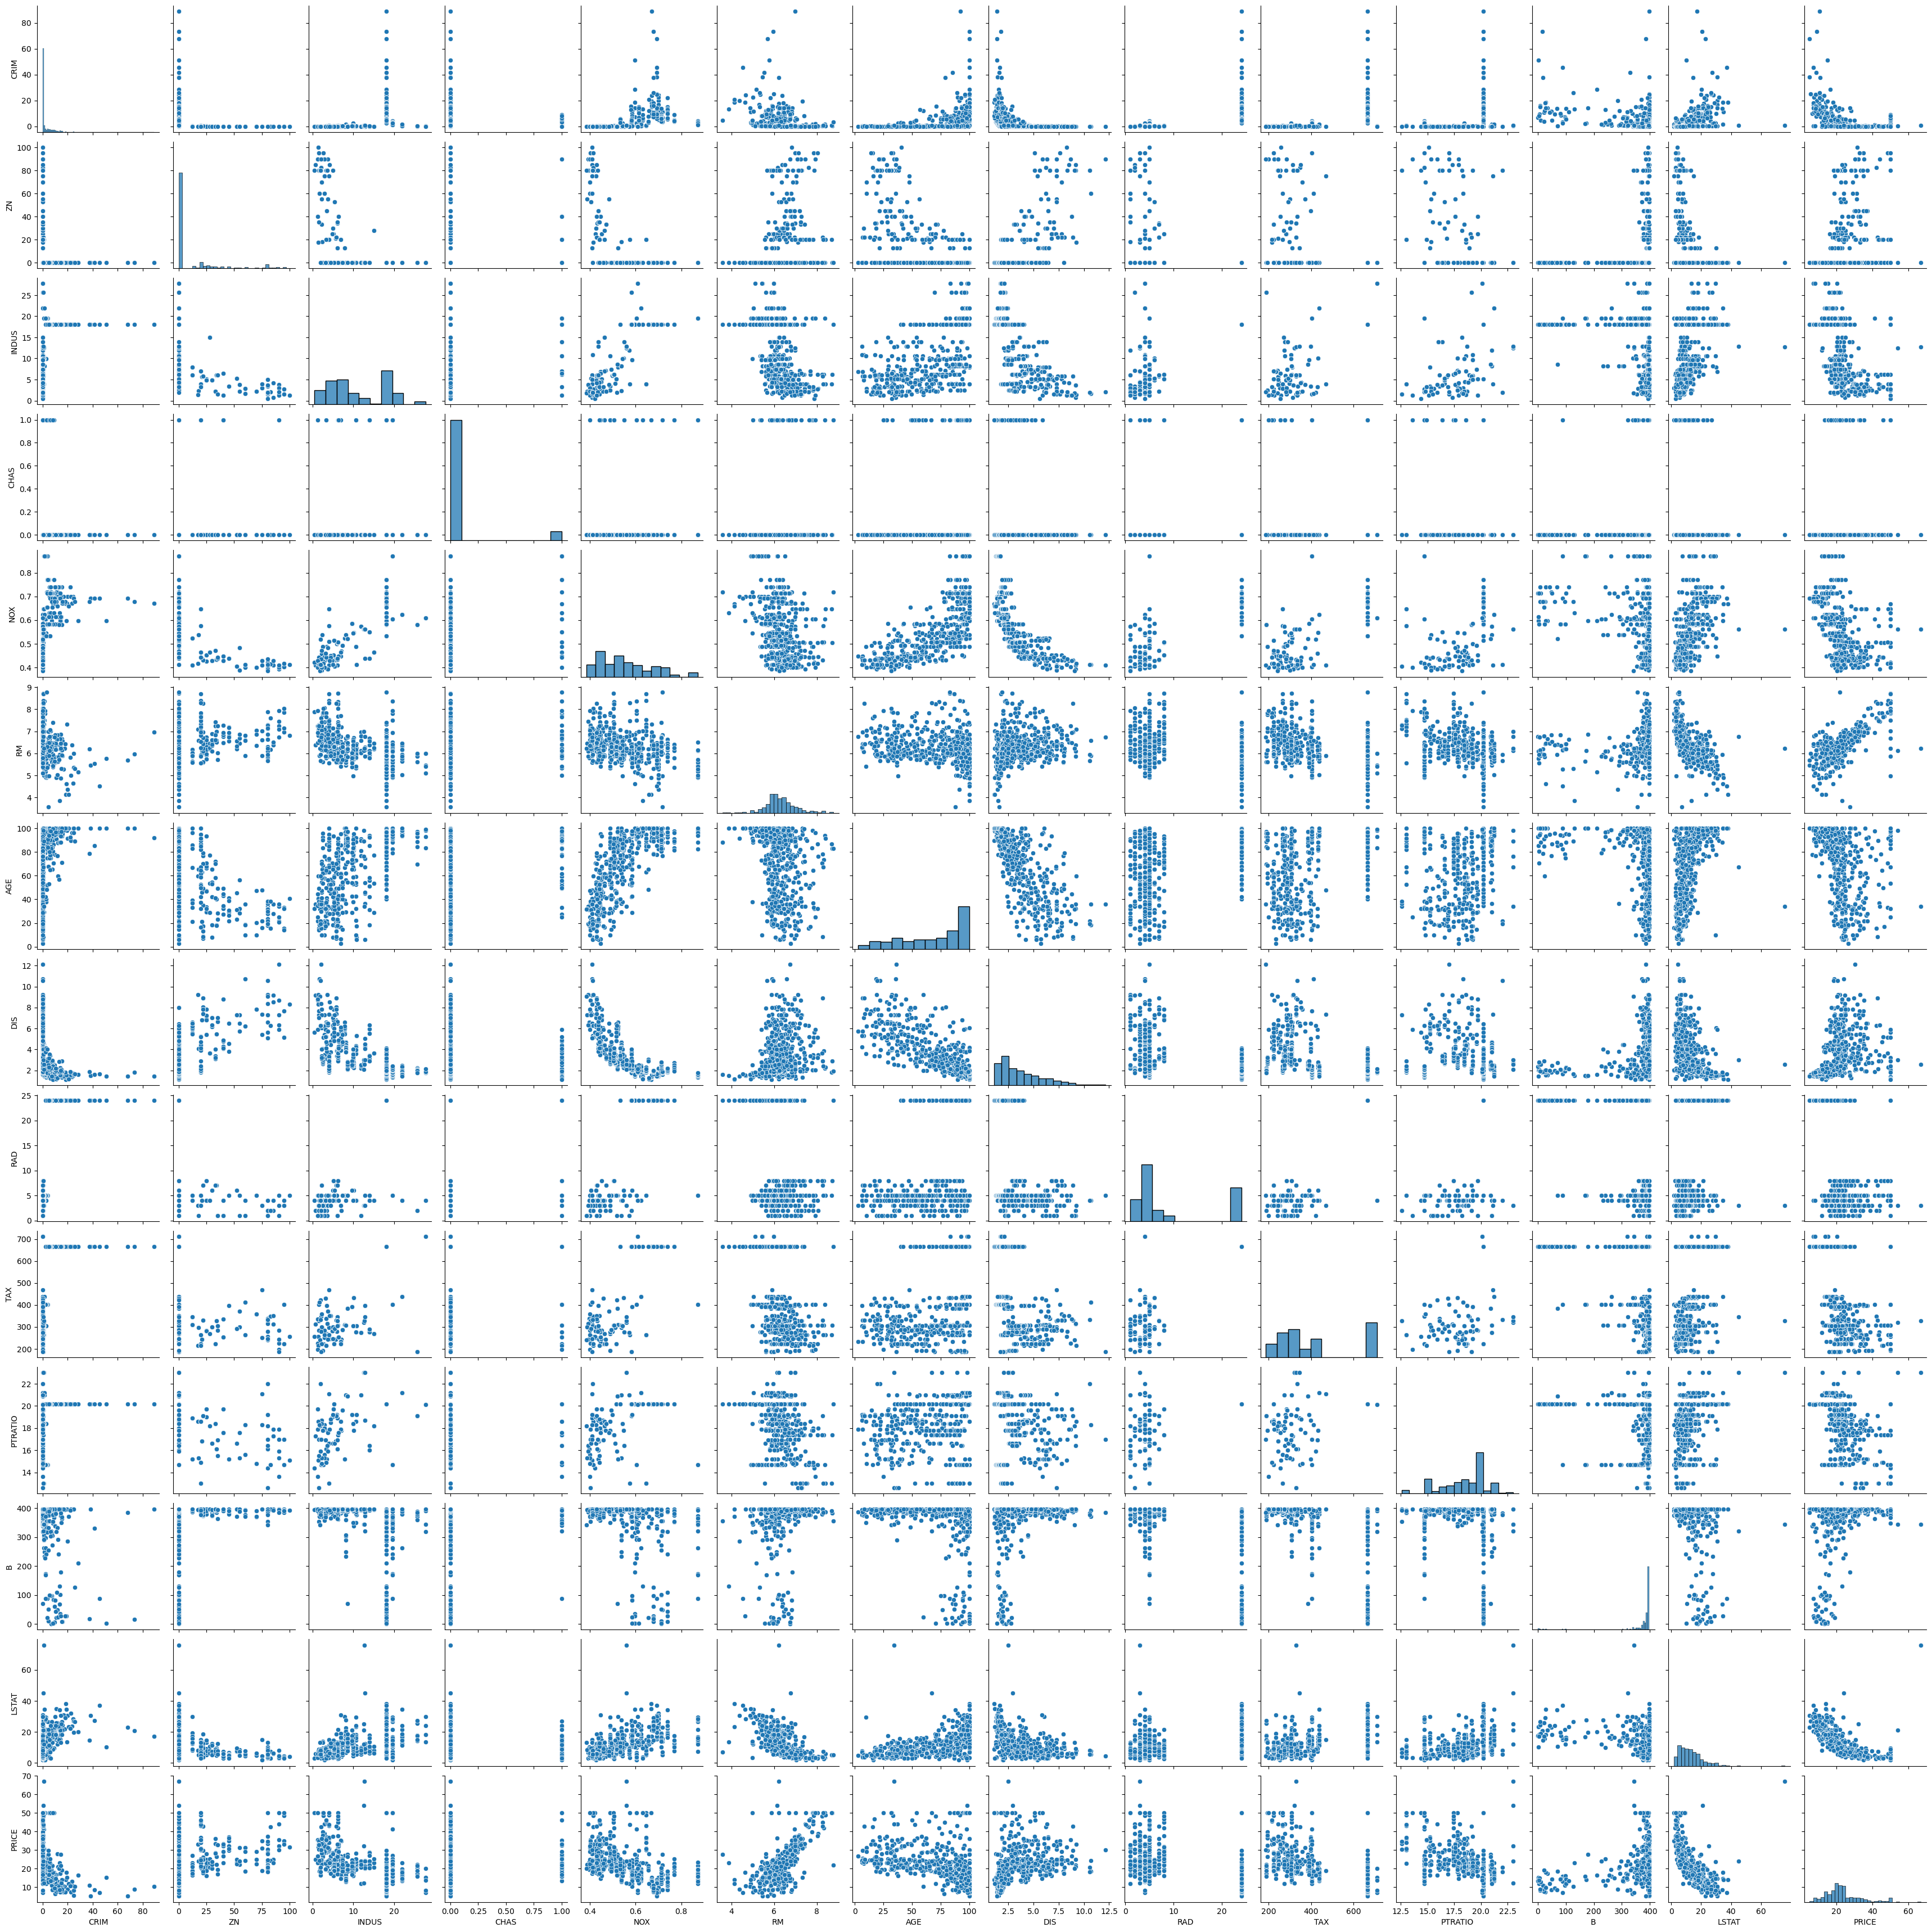

In [268]:
import seaborn as sns
sns.pairplot(dataset)

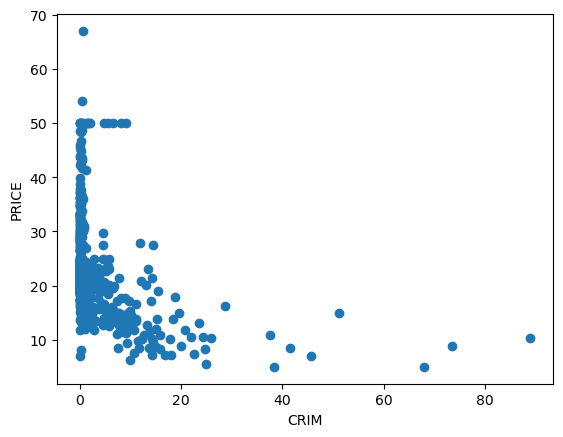

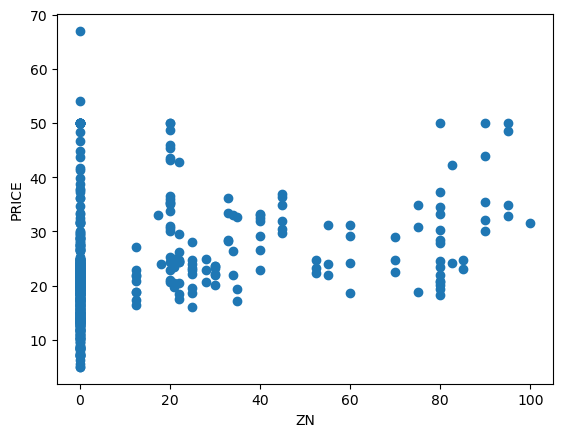

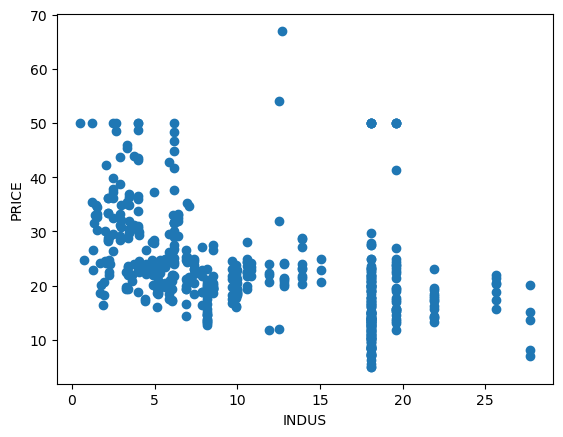

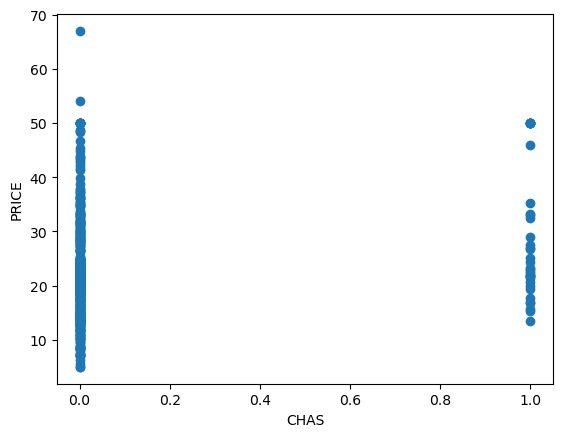

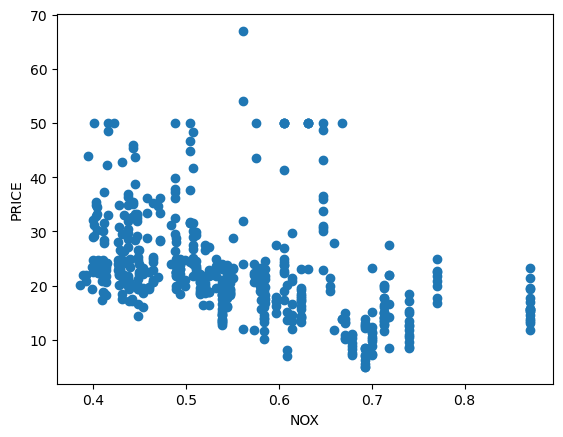

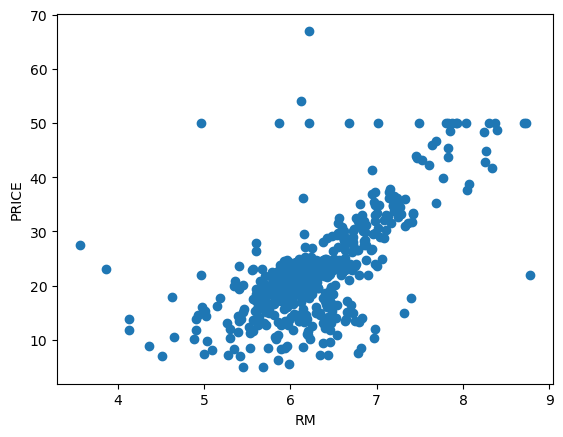

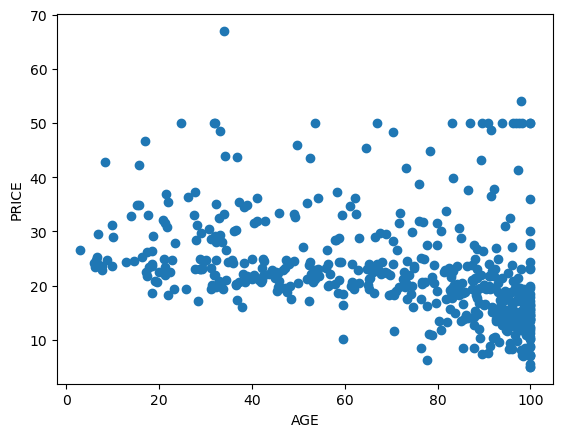

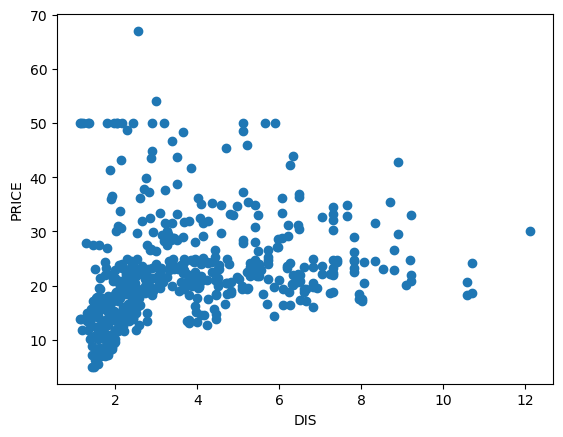

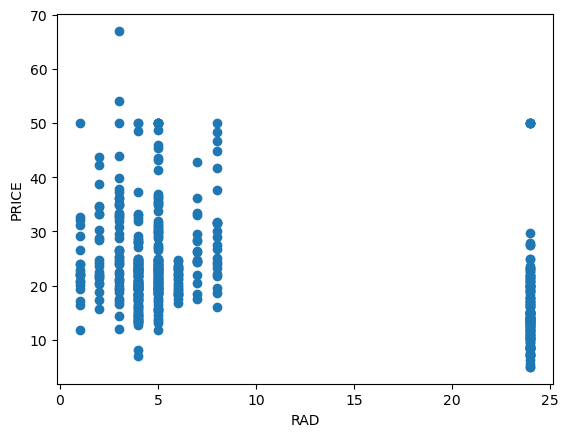

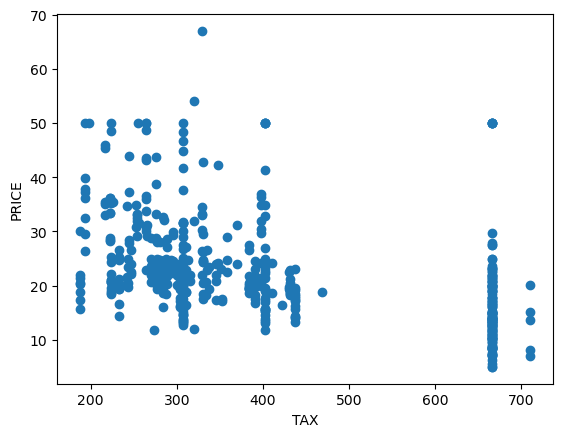

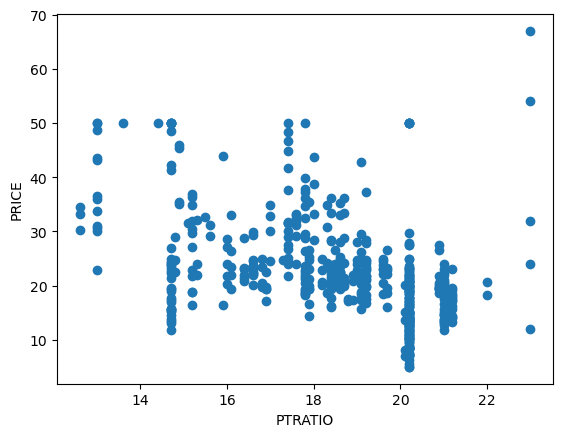

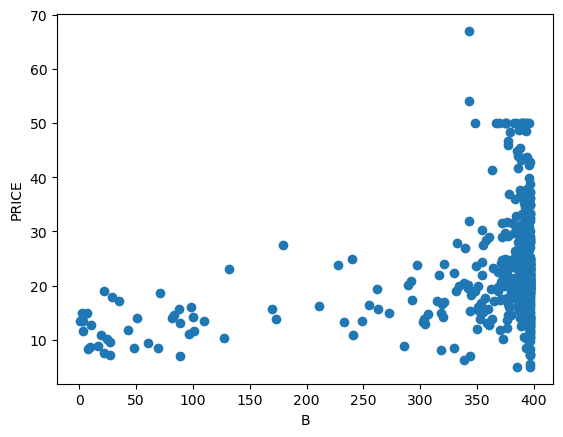

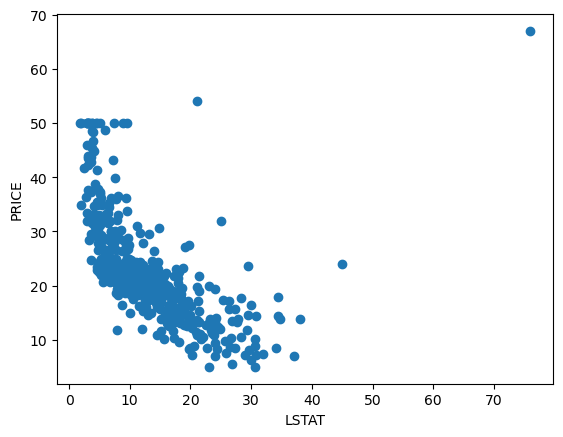

In [269]:
## scatter plot, each column vs price
for column in dataset.columns:
    if column == 'PRICE':
        continue
    plt.figure()
    plt.scatter(dataset[column], dataset['PRICE'])
    plt.xlabel(column)
    plt.ylabel("PRICE")

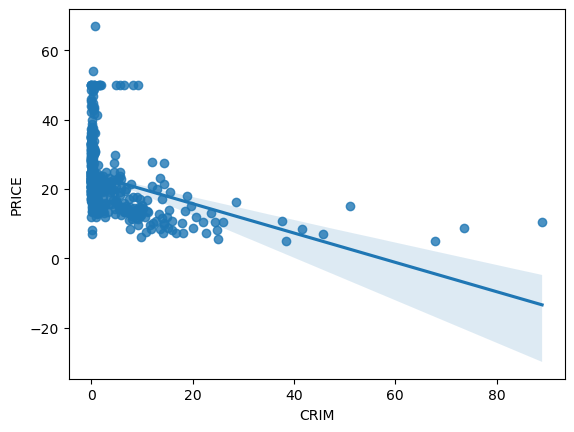

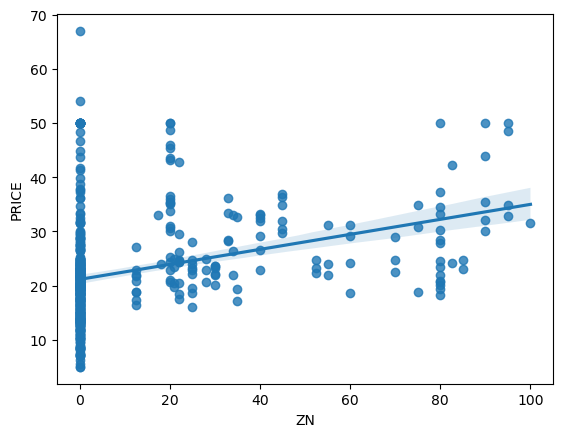

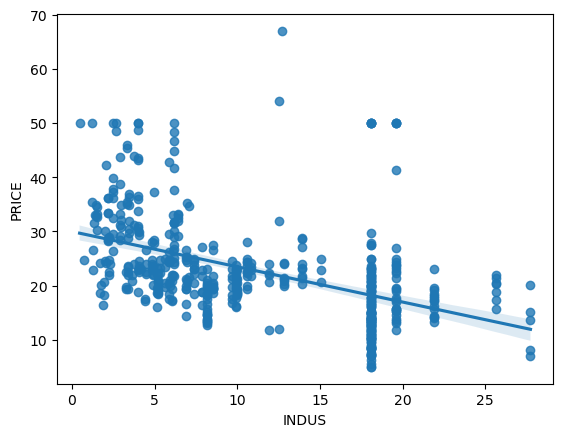

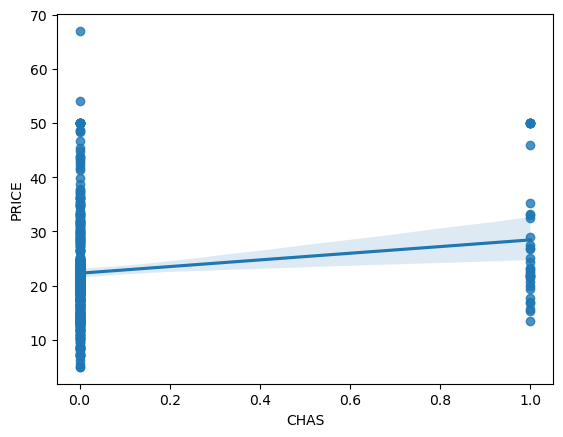

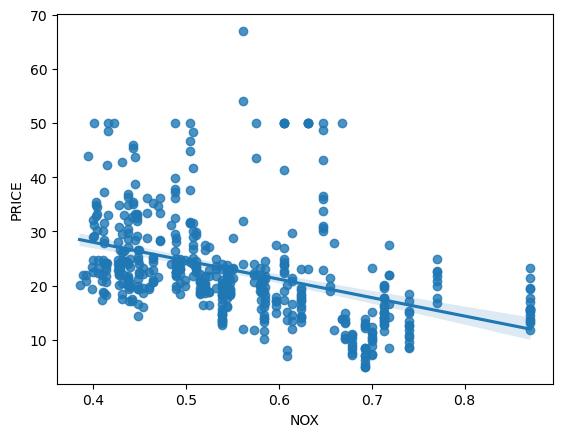

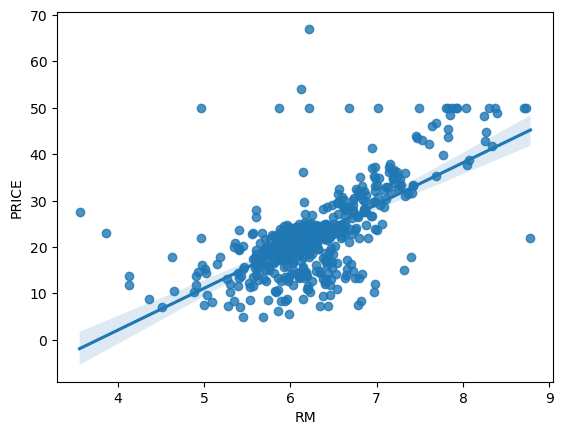

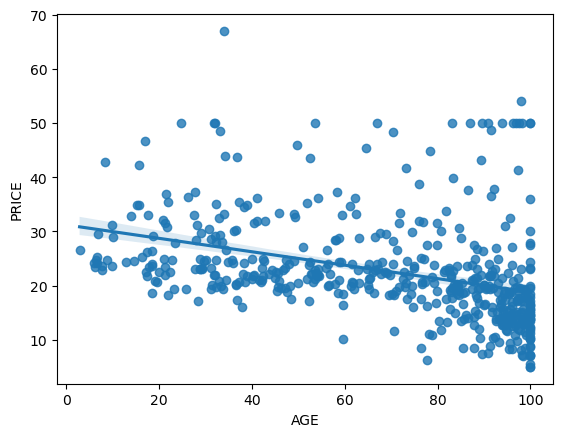

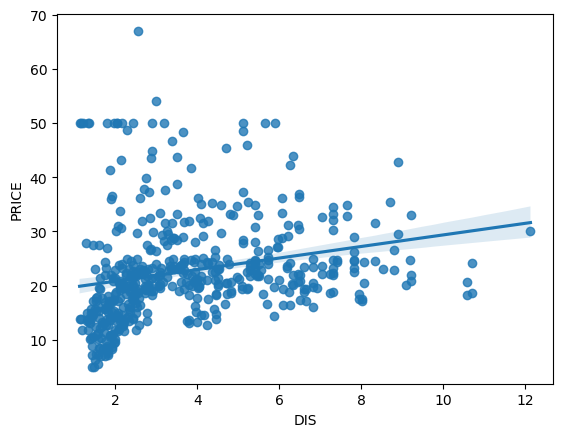

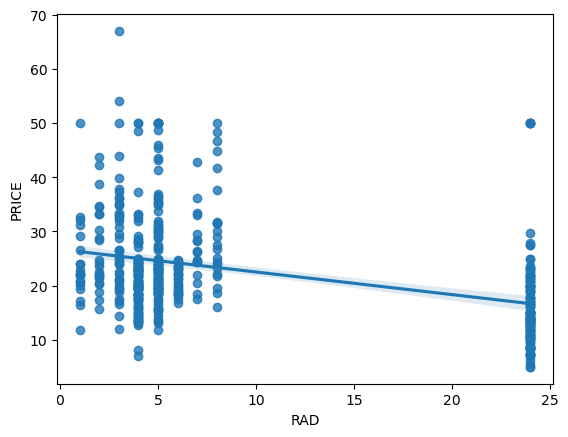

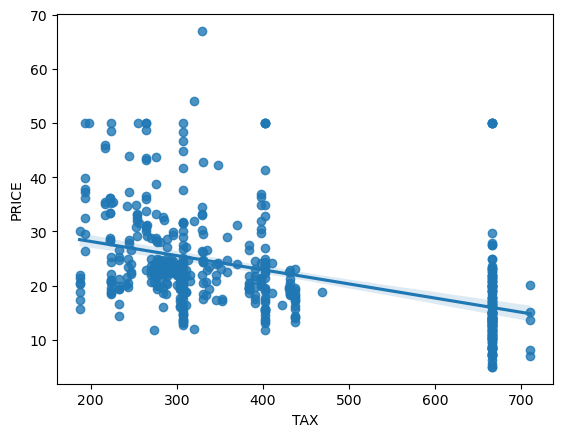

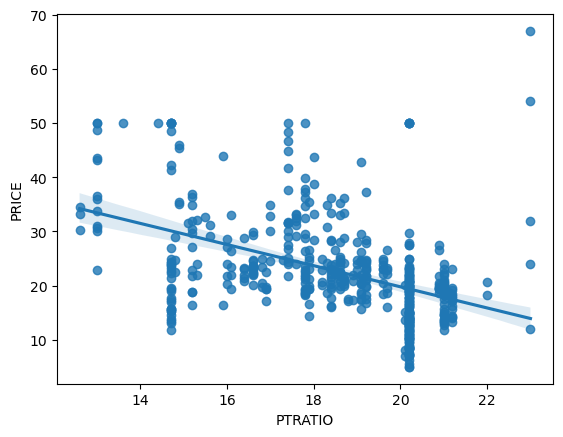

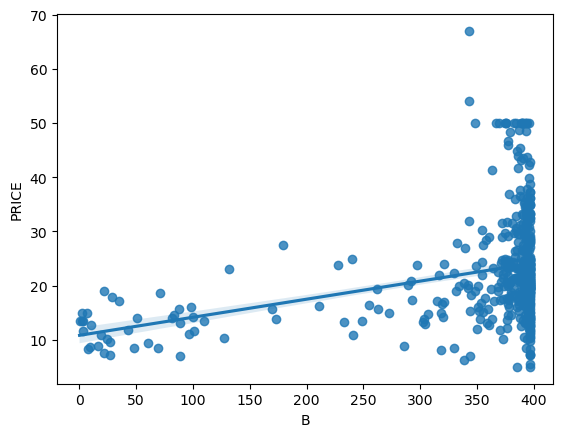

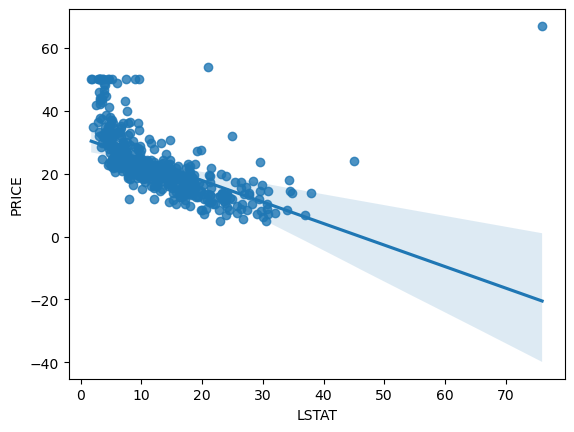

In [270]:
## regular expression plot on each column vs price
for column in dataset.columns:
    if column=='PRICE':
        continue
    plt.figure()
    sns.regplot(x=dataset[column],y=dataset['PRICE'], data=dataset)

In [271]:
## dividing Independent and dependent features 

X=dataset.iloc[:, :-1]
y=dataset.iloc[:,-1]
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
506  0.98765   0.0  12.50     0  0.561  6.980  89.0  2.0980    3  320   
507  0.23456   0.0  12.50     0  0.561  6.980  76.0  2.6540    3  320   
508  0.44433   0.0  12.50     0  0.561  6.123  98.0  2.9870    3  320   
509  0.77763   0.0  12.70     0  0.561  6.222  34.0  2.5430    3  329   
510  0.65432   0.0  12.80     0  0.561  6.760  67.0  2.9870    3  345   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [272]:
## Train Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [273]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80
17,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67
473,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,11.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11


In [274]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
178,0.06642,0.0,4.05,0,0.5100,6.860,74.4,2.9153,5,296,16.6,391.27,6.92
279,0.21038,20.0,3.33,0,0.4429,6.812,32.2,4.1007,5,216,14.9,396.90,4.85
496,0.28960,0.0,9.69,0,0.5850,5.390,72.9,2.7986,6,391,19.2,396.90,21.14
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
457,8.20058,0.0,18.10,0,0.7130,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,6.28807,0.0,18.10,0,0.7400,6.341,96.4,2.0720,24,666,20.2,318.01,17.79
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30
230,0.53700,0.0,6.20,0,0.5040,5.981,68.1,3.6715,8,307,17.4,378.35,11.65
438,13.67810,0.0,18.10,0,0.7400,5.935,87.9,1.8206,24,666,20.2,68.95,34.02


In [275]:
y_train

5      28.7
120    22.0
47     16.6
17     17.5
473    29.8
       ... 
110    21.7
275    32.0
353    30.1
440    10.5
106    19.5
Name: PRICE, Length: 354, dtype: float64

In [276]:
y_test

178    29.9
279    35.1
496    19.7
75     21.4
457    13.5
       ... 
446    14.9
24     15.6
230    24.3
438     8.4
452    16.1
Name: PRICE, Length: 152, dtype: float64

In [277]:
## Standardizing the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)


In [278]:
X_test=scaler.transform(X_test)

In [279]:
X_train

array([[-0.42020828, -0.51166671, -1.29703093, ...,  0.15121767,
         0.40659597, -0.94309062],
       [-0.4153799 , -0.51166671,  2.08336402, ...,  0.32615576,
         0.35169121,  0.19394099],
       [-0.39560748, -0.51166671, -0.61576685, ..., -0.19865851,
         0.39135079,  0.74383728],
       ...,
       [-0.42178238,  3.24795074, -1.32007581, ..., -0.59226921,
         0.29987968, -1.03122298],
       [ 2.296372  , -0.51166671,  0.99593403, ...,  0.80723551,
         0.37709985,  1.15470787],
       [-0.4027711 , -0.51166671, -0.37811658, ...,  1.11337717,
         0.42371919,  0.72645907]])

In [280]:
X_test

array([[-0.41569694, -0.51166671, -1.02769397, ..., -0.76720731,
         0.37511135, -0.73082817],
       [-0.39793778,  0.32380384, -1.1313959 , ..., -1.51069419,
         0.43730728, -0.98777745],
       [-0.38816506, -0.51166671, -0.21536216, ...,  0.36989029,
         0.43730728,  1.03430169],
       ...,
       [-0.35764536, -0.51166671, -0.71802847, ..., -0.41733112,
         0.23238108, -0.14369285],
       [ 1.26346394, -0.51166671,  0.99593403, ...,  0.80723551,
        -3.18563335,  2.63309722],
       [ 0.20404173, -0.51166671,  0.99593403, ...,  0.80723551,
         0.30683944,  0.55391824]])

## Model Training

In [281]:
from sklearn.linear_model import LinearRegression

In [282]:
regression = LinearRegression()

In [283]:
regression.fit(X_train, y_train)

LinearRegression()

In [284]:
## Print coefficients and intercepts

print(regression.coef_)

[-1.3849637   1.08928303 -0.02177479  0.64585227 -1.57132988  4.91748344
 -1.51276453 -3.40735637  1.64199699 -1.95118858 -1.27755454  1.21891999
 -0.19872226]


In [285]:
print(regression.intercept_)

23.280790960451988


In [286]:
## which parameters the model trained ?
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [287]:
### Prediction with Test Data

reg_pred = regression.predict(X_test)
reg_pred

array([30.61689454, 34.51202302, 17.31650703, 24.2730613 , 11.97611961,
       22.14212772, 24.57470963, 17.7350784 , 22.83901133, 21.58035328,
       28.07183595, 19.00200894, 19.49158597, 26.21028154, 21.50880615,
       19.75924143, 21.98796284, 20.1458269 , 32.0933933 , 26.23578197,
       36.69833698, 46.05946667, 18.17824217, 26.75554824, 15.06821291,
       20.35105402, 26.20640086, 18.41424195, 25.2961538 , 22.72718237,
       26.45034608, 25.70564938, 12.50235355,  1.05415451, 23.34666217,
       23.51739084, 30.26478116, 30.53966735, 27.04893071, 23.12940517,
       25.92309657, 22.40773734, 18.87804649, 23.1682047 , 28.72739399,
       21.64811443, 17.22068319, 25.74433063, 19.38754271, 27.86590491,
       22.72441099, 22.36341872, 16.70400027, 20.142665  , 38.51680684,
        9.26586515, 18.66265254, 28.15236376, 25.26030015, 25.03200451,
       24.64169843, 30.81851522, 31.0615401 , 18.48361004, 20.62769358,
       21.37982177, 15.59642336, 27.6150578 , 29.84856991, 20.87

## Assumptions

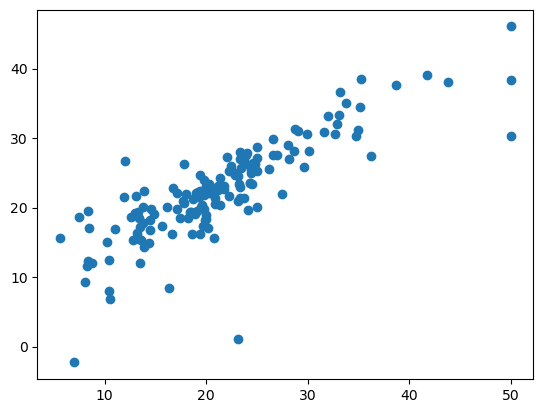

In [288]:
## scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [289]:
## residuals (erros)
residuals = y_test-reg_pred

In [290]:
residuals

178   -0.716895
279    0.587977
496    2.383493
75    -2.873061
457    1.523880
         ...   
446   -4.217293
24    -1.809016
230    0.738331
438   -3.847499
452   -3.986751
Name: PRICE, Length: 152, dtype: float64

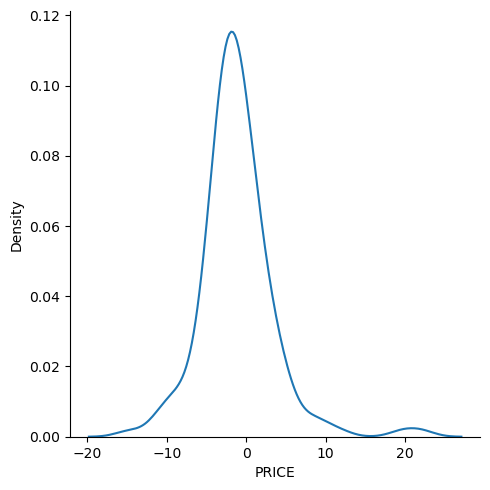

In [291]:
## plotting the residuals 

sns.displot(residuals, kind='kde')

## scatter plot with respective prediction and residuals
## uniform distribution tells us that model is performing well

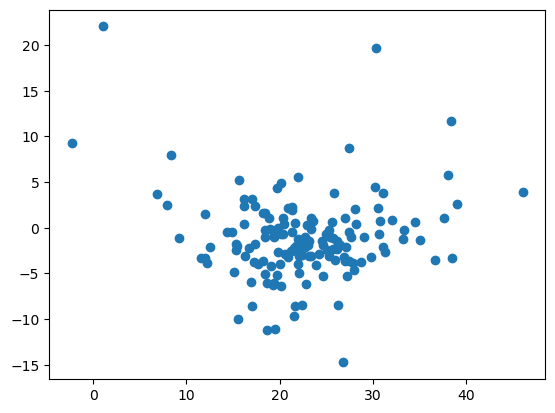

In [292]:


plt.scatter(reg_pred, residuals)

## performance metrics

In [293]:
 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred, squared=False))
#print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.336929405157136
22.172601641026716
4.708779209203455


## R square

In [294]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.6739220342661689


## New Data Prediction

In [295]:
dataset.iloc[0,:-1].shape

(13,)

In [296]:
np.array(dataset.iloc[0,:-1]).reshape(1,-1).shape

(1, 13)

In [297]:
np.array(dataset.iloc[0,:-1]).reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [298]:
## New data transformation

scaler.transform(np.array(dataset.iloc[0,:-1]).reshape(1,-1))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42311098,  0.24025678, -1.27830697, -0.26967994, -0.15574145,
         0.37511444, -0.15106223,  0.15530102, -0.98065409, -0.65224665,
        -1.3357561 ,  0.43730728, -0.97164054]])

In [299]:
regression.predict(scaler.transform(np.array(dataset.iloc[0,:-1]).reshape(1,-1)))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([27.86590491])

## Pickling the model for deployment


In [300]:
import pickle

In [301]:
pickle.dump(regression,open('regmodel.pkl', 'wb'))

In [302]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [303]:
pickled_model.predict(scaler.transform(np.array(dataset.iloc[0,:-1]).reshape(1,-1)))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([27.86590491])